#Numerical Integration 

Say that you want to solve the following integrals:

$$
\int_{-3}^{3}dx\frac{1}{\sqrt{1+\cos{x}\sin{x}}}
$$

$$
\int_{-1}^{1}dx\int_{-1}^{1}dy\exp{-\left(\sin\left(\frac{x^2+ y^2}{0.1}\right)\right)}
$$

how do you do it?

First, let's take a look at those functions.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


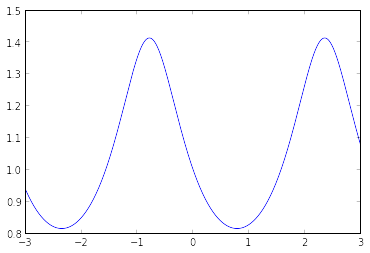

In [2]:
x = linspace(-3.0,3.0,1000)
y = 1.0/sqrt(1+(cos(x)*sin(x)))
plot(x,y)

In [3]:
# I create a 2D function
def my_func(x, y):
    return exp(-sin((x**2 + y**2)/0.1))

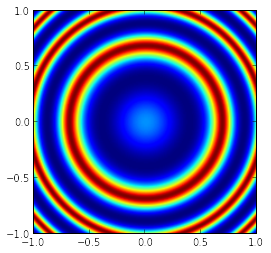

In [4]:
grid_x, grid_y = mgrid[-1:1:200j, -1:1:200j]
grid_z = my_func(grid_x, grid_y)
imshow(grid_z.T, extent=(-1,1,-1,1), origin='lower')

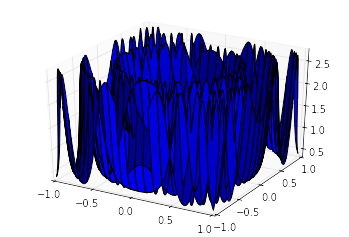

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(grid_x,grid_y,grid_z)

#1D integrals

Concerning the 1D integral, the first intuitive option is seeing the function $y = f(x)$ as a step-wise function evaluated at a series of points $y_{i} = f(x_{i})$, $i=0,N$. Each one of this steps can be thought as a a series of boxes of some width $h$.

<Container object of 12 artists>

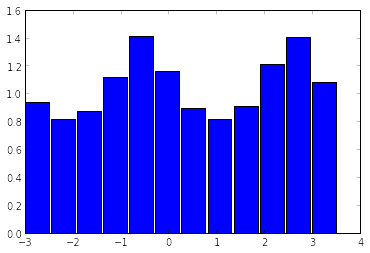

In [6]:
h = 0.5
n_points = int(6.0/h)
x = linspace(-3.0,3.0,n_points)
y = 1.0/sqrt(1+(cos(x)*sin(x)))
bar(x,y, width=h)

<Container object of 60 artists>

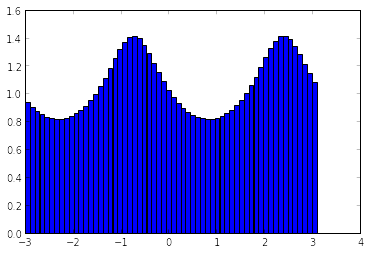

In [7]:
h = 0.1
n_points = int(6.0/h)
x = linspace(-3.0,3.0,n_points)
y = 1.0/sqrt(1+(cos(x)*sin(x)))
bar(x,y, width=h)

<Container object of 600 artists>

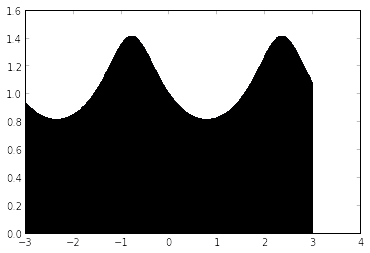

In [8]:
h = 0.01
n_points = int(6.0/h)
x = linspace(-3.0,3.0,n_points)
y = 1.0/sqrt(1+(cos(x)*sin(x)))
bar(x,y, width=h)

In this case, the integral can be thought as the sum of the area of all the boxes
$$
\int_{a}^{b} f(x)dx = \lim_{h \to 0} = \left[\sum_{i=1}^{(b-a)/h}hf(x_{i})\right] \sim \sum_{i=1}^{N} f(x_i) w_i
$$

where in the last approximation we think of intevarls of different width $w_i$. 
In the cases we had before:

In [9]:
h = 0.5
n_points = int(6.0/h)
x = linspace(-3.0,3.0,n_points)
y = 1.0/sqrt(1+(cos(x)*sin(x)))
integral = sum(y) * h
print 'integral=', integral

integral= 6.31393687193


In [10]:
h = 0.1
n_points = int(6.0/h)
x = linspace(-3.0,3.0,n_points)
y = 1.0/sqrt(1+(cos(x)*sin(x)))
integral = sum(y) * h
print 'integral=', integral

integral= 6.33751866107


In [11]:
h = 0.01
n_points = int(6.0/h)
x = linspace(-3.0,3.0,n_points)
y = 1.0/sqrt(1+(cos(x)*sin(x)))
integral = sum(y) * h
print 'integral=', integral

integral= 6.34216434753


In [12]:
h = 0.001
n_points = int(6.0/h)
x = linspace(-3.0,3.0,n_points)
y = 1.0/sqrt(1+(cos(x)*sin(x)))
integral = sum(y) * h
print 'integral=', integral

integral= 6.34261322628


In this case all the points have the same weight \{$w_{i}$\} = $h$.

It is also possible to think that the function is composed by trapezoids, instead of boxes. In this case

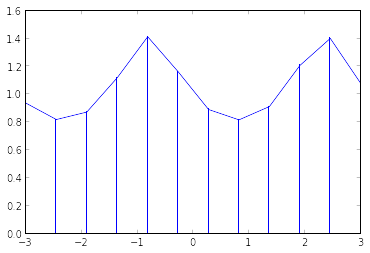

In [13]:
h = 0.5
n_points = int(6.0/h)
x = linspace(-3.0,3.0,n_points)
y = 1.0/sqrt(1+(cos(x)*sin(x)))
integral = sum(y) * h
plot(x,y)
for point_x, point_y in zip(x,y):
    plot([point_x, point_x], [0.0, point_y], color='blue')

In the case of $N+1$ points the integral becomes
$$
\sum_{i=1}^{N} \frac{h}{2}(f(x_{i+1})+f(x_{i})) = \frac{h}{2}f(x_{1}) + hf(x_{2}) +\ldots+h f(x_{N}) +\frac{h}{2}f(x_{N+1})
$$

meaning that the weights are 
$$
w_i=\frac{h}{2},h,\ldots,h,\frac{h}{2}.
$$
By extension on can also think that three points can be connected by the parabola that goes through these points. In this case on can approximate each interval

$$
\int_a^b f(x) dx \approx \frac{(b-a)}{6}\left[ f(a) + 4 f((a+b)/2) + f(b)\right]
$$

This is known as the Simpson rule, and one can show that in that case the corresponding weights are

$$
w_i = \frac{h}{3},\frac{4h}{3}, \frac{2h}{3}, \frac{4h}{3}\ldots, \frac{4h}{3},\frac{2h}{3} , \frac{4h}{3} , \frac{h}{3}
$$

It is important to note that the number of points $N$ must be odd for this to work.

# 2D integrals (using Monte-Carlo)

The methods we have used might be extended to 2-D integrals but they quickly become cumbersome. Instead we will follow the path of Monte-Carlo integration for highly dimensional integrals.

The principle is that to solve an integral in 2-D, we will generate a swarm of points in 3D within the intervals that we care: $x_{\rm min}, x_{\rm max}$, $y_{\rm min}$, $y_{\rm max}$, $f_{\rm min}(x,y)$ and $f_{\rm max}(x,y)$. 

Let's start with a concrete example. The integral of a 1-D gaussian:
$$
\int_{-5}^{5} \exp(-x^2)dx \sim \int_{-\infty}^{\infty}\exp{(-x^2)} = \sqrt{\pi}
$$

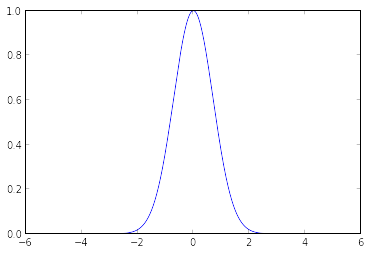

In [14]:
def my_gauss(x):
    return exp(-(x**2))
min_x = -5.0
max_x = 5.0
x = linspace(min_x,max_x,1000)
gaussian = my_gauss(x)
plot(x,gaussian)

    

In [15]:
#this function hast the folowing bounds
min_y = 0.0
max_y = amax(gaussian)
print min_y, max_y

0.0 0.999974950239


In [16]:
#we now generate n_random points in x and y
n_random = 10000
random_x = random.rand(n_random) * (max_x - min_x) + min_x
random_y = random.rand(n_random) * (max_y - min_y) + min_y

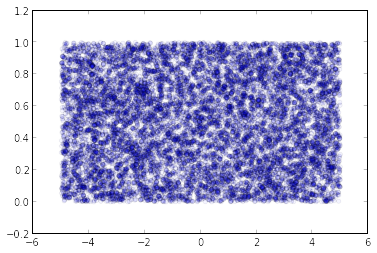

In [17]:
scatter(random_x, random_y, alpha=0.2)

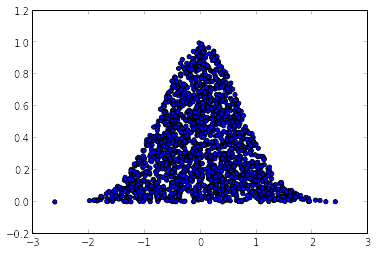

In [18]:
#now comes the  selection of all the points in random_y that are below the gaussian:
delta = my_gauss(random_x) - random_y
below  = where(delta>0.0)
scatter(random_x[below], random_y[below])


In [19]:
#and this is the final result. The integral can be calculated as a fraction of the points below the curve.
interval_integral = (max_y-min_y) * (max_x - min_x)
integral  = interval_integral * (size(below)/(1.0*size(random_y)))

#how many points are 'below'?
print 'inside:', size(below), 'total:', size(random_y)

inside: 1706 total: 10000


In [20]:
#lets compare the results with other techniques
from scipy.integrate import quad
integral_scipy,err = quad(my_gauss, -5.0, 5.0)
print integral, integral_scipy, sqrt(pi), 

1.70595726511 1.7724538509 1.77245385091


Now let's integrate a 4-dimensional gaussian

In [21]:
def my_gauss_4D(x,y,z,w):
    r = x**2 + y**2 + z**2 + w**2
    return exp(-r)

min_val = -5.0
max_val = 5.0
n_random = 1000000
random_x = random.rand(n_random) * (max_val - min_val) + min_val
random_y = random.rand(n_random) * (max_val - min_val) + min_val
random_z = random.rand(n_random) * (max_val - min_val) + min_val
random_w = random.rand(n_random) * (max_val - min_val) + min_val

random_v = random.rand(n_random) 

delta = my_gauss_4D(random_x,random_y, random_z, random_w) - random_v
inside = where(delta>0.0)

interval_integral = (max_val - min_val) ** 4
integral  = interval_integral * (size(inside)/(1.0*size(random_v)))

#how many points are 'inside'?
print 'inside:', size(inside), 'total:', size(random_v)


inside: 937 total: 1000000


In [22]:
#this is the comparison with the expected value
print integral, sqrt(pi**4)

9.37 9.86960440109


# Integrals by mean value

Now we introduce the more standard Monte-Carlo technique. It is based on the mean value theorem

$$
\int_a^b f(x) = (b-a)\langle f\rangle
$$

In this way we can simply approximate the average value of $f$ as the average of different values $f(x_i)$ and we can write

$$
\int_a^b f(x) = (b-a)\frac{1}{N}\sum_{i=1}^N f(x_i)
$$

where the $x_i$ are numbers randomly generated following a flat distribution in the range $a<x<b$.





In [23]:
# Let's try this method
def my_gauss(x):
    return exp(-(x**2))
min_x = -5.0
max_x = 5.0

x = random.random(1000000) * (max_x - min_x) + min_x
y = my_gauss(x)

integral = average(y) * (max_x - min_x)

print integral, sqrt(pi)

1.77243180684 1.77245385091


#Exercises 

1. (Taken from *A Survey of Computational Physics* Landau, Paez, Bordeianu) Evaluate the 10-D integral

$$
\int_0^1 dx_1 \cdots\int_0^1 dx_{10} (x_1 + x_2 +\cdots+x_{10})^2
$$

and check our answer againts the analytical result $155/6$.